In [1]:
import pandas as pd 
import numpy as np 

In [2]:
dataframe = pd.read_excel('15-Points.xlsx')
 
print(dataframe)

               x             y  City
0   5.500000e-08  9.860000e-09     1
1  -2.887330e+01 -7.980000e-08     2
2  -7.929160e+01 -2.140330e+01     3
3  -1.465770e+01 -4.338960e+01     4
4  -6.474730e+01  2.189820e+01     5
5  -2.905850e+01 -4.321670e+01     6
6  -7.207850e+01  1.815810e-01     7
7  -3.603660e+01 -2.161350e+01     8
8  -5.048080e+01  7.374470e+00     9
9  -5.058590e+01 -2.158820e+01    10
10 -1.358190e-01 -2.872930e+01    11
11 -6.508660e+01 -3.606250e+01    12
12 -2.149830e+01  7.319420e+00    13
13 -5.756870e+01 -4.325060e+01    14
14 -4.307000e+01  1.455480e+01    15


In [3]:
import pandas as pd
import sys
import math
from scipy.spatial.distance import cdist

def nearest_neighbor_algorithm(df):
    # calculate distance matrix
    dist_matrix = [[math.sqrt((df['x'][i] - df['x'][j])**2 + (df['y'][i] - df['y'][j])**2)
                  for j in range(len(df))] for i in range(len(df))]
    #print(dist_matrix)


    # start from node 0
    current_node = 0
    # set the initial path as starting node
    path = [current_node]
    # keep track of visited nodes
    visited = set([current_node])
    # keep track of total distance
    total_distance = 0
    # repeat until all nodes have been visited
    while len(visited) < len(df):
        # find the nearest neighbor
        nearest_neighbor = None
        min_dist = np.inf
        for node in range(len(df)):
            if node != current_node and node not in visited:
                dist = dist_matrix[current_node][node]
                if dist < min_dist:
                    min_dist = dist
                    nearest_neighbor = node
        # update current node, path, visited set and total distance
        current_node = nearest_neighbor
        path.append(current_node)
        visited.add(current_node)
        total_distance += min_dist
    # add the final edge back to starting node
    path.append(0)
    total_distance += dist_matrix[current_node][0]
    #path_of_cities = [x+1 for x in path]
    return  path, total_distance

[0, 12, 1, 14, 8, 4, 6, 2, 11, 13, 9, 7, 5, 3, 10, 0]
284.3810904080332


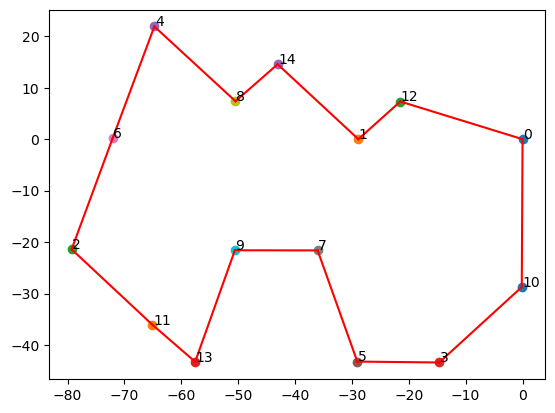

In [4]:
import sys
import math
import matplotlib.pyplot as plt

def plot_cities_and_path(df, path):
    # plot cities with labels
    for i, (x, y) in enumerate(zip(df['x'], df['y'])):
        plt.scatter(x, y)
        plt.text(x+0.1, y+0.1, str(i), fontsize=10)
    # plot path
    for i in range(len(path) - 1):
        plt.plot([df['x'][path[i]], df['x'][path[i+1]]],
                 [df['y'][path[i]], df['y'][path[i+1]]], 'r-')
    plt.show()


# example usage
path, distance = nearest_neighbor_algorithm(dataframe)
print(path)
print(distance)
plot_cities_and_path(dataframe, path)